# Review- [Multiplexing Biochemical Signals](https://arxiv.org/pdf/1008.0576.pdf)
__Abstract__:
In this paper we show that living cells can multiplex biochemical signals, i.e. transmit multiple
signals through the same signaling pathway simultaneously, and yet respond to them very specifically.
We demonstrate how two binary input signals can be encoded in the concentration of a common
signaling protein, which is then decoded such that each of the two output signals provides reliable
information about one corresponding input. Under biologically relevant conditions the network can
reach the maximum amount of information that can be transmitted, which is 2 bits.

<img src='img/multi/fig1.png'>

## About multiplexing in engineering

1. [Multiplexing](https://en.wikipedia.org/wiki/Multiplexing)

    A. [Amplitude modulation (AM)](https://en.wikipedia.org/wiki/Amplitude_modulation)
    
    B. [Frequency modulation (FM)](https://en.wikibooks.org/wiki/Communication_Systems/Frequency_Modulationn)
    
  

## Problem Setup
__Biochemical network component__: 

1. Input $S$ with N species:        
$$S_1,...,S_N$$
2. Channel $\nu$ with M species:
$$V_1,...,V_M$$
3. Output X with N species:
$$X_1,...,X_N$$
4. Input $S_i$ can be in one of $K$ states:
$$s_i=0,...,K-1$$
5. Input are labeled in order:
$$S^{0}_i < S^{1}_i < \cdots < S^{N}_i$$
6. Input vector:
$$\vec{s}=(s_1,...,s_N)$$
7. Output are labeled in one of $L$ states:
$$x_i = 0,...,L-1$$
8. Output are labeled in order:
$$X^{0}_i < X^{1}_i < \cdots < X^{N}_i$$
9. Output vector:
$$\vec{x} = (x_0,...,x_N)$$

__Necessary condition__: 

The state space of $\nu$ is large enough that it is possible to encode $K^N$ input patterns in $\nu$

__Assumption__:

1. N input signals are independent, and the signal transduction network $\nu$ replaces $N$ independent signaling pathways.
2. $X_i$ should provide reliable information about the state $s_i$, but not necessarily about $s_{j \ne i}$ 
3. The output state:
$$x_i=f(\vec{s})$$

__Requirement__:

1. Monotonic input-output relation between $S_i$ and $X_i$ for each i

## Network in this Article

1. Input

    A. N=2
    
    B. $S_1$, $S_2$
    
    C. $s_i=\{0,1\}$ 

2. The four input patterns $\vec{s}$ can be mapped onto 4 distinct states of $V$, $V^{(\nu)}$ with $\nu=0,...,3$
$$V^{(0)} < V^{(1)} < V^{(2)} < V^{(3)}$$

3. Output

    A. L=2
    
    B. $\chi_{1}$, $\chi_{2}$
    
    C. $x_i=\{0,1,2,3\}$
        
        a. Low set   := {0,1}
        
        b. High set  := {2,3} 

## The steady state value of output

$$X_1 = k_1 f(V;K_\alpha, n_\alpha)/\mu$$

$$X_2 = k_2 f(V;K_\beta, n_\beta) \times f(X_1;K_\gamma, n_\gamma) /\mu$$

f represents [Hill function](https://en.wikipedia.org/wiki/Hill_equation_(biochemistry):
$$f(V;K,n)=\frac{V^n}{(V^n+K^n)}$$
$$f(V;K,n)=\frac{K^n}{(V^n+K^n)}$$



In [1]:
# Plot X_1, X_2

def hill_act(l, k, n):
    """
    Activating Hill function
    
    Argument:
            l: float >=0. ligand
            k: float >=0. Dissociation constant
            n: float >=0. hill coefficient
    
    Return:
            y: Fraction of the receptor protein concentration that is bound to ligand.
    """
    return l**n/(l**n + k**n)

def hill_rep(l, k, n):
    """
    Repressing Hill function
    Argument:
            l: float >=0. ligand
            k: float >=0. Dissociation constant
            n: float >=0. hill coefficient
    
    Return:
            y: Fraction of the receptor protein concentration that is bound to ligand.
    """
    return 1.0 - hill_act(l, k, n)

def x1(v, k_1, k_a, n_a, u):
    """
    x1 node output value
    
    Argument:
            v
            par= [k_1, k_a, n_a, u]
    """
    
    return k_1 * hill_act(v, k_a, n_a)/u

def x2(v, x, k_2, k_b, k_y, n_b, n_y, u):
    """
    x2 node output value
    
    Argument:
            v, x
            par= [k_2, k_b, n_b, u]
    """
    return k_2 * hill_act(v, k_b, n_b) * hill_rep(x, k_y, n_y)/u
    

In [2]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(n=7, k_1=6, k_2=6, k_a=5, k_b=3, k_y=4):
    par_x1 = {
            'k_1': k_1,
            'k_a': k_a,
            'n_a': n,
              'u': 1
         }

    par_x2 = {
            'k_2': k_2,
            'k_b': k_b,
            'k_y': k_y,
            'n_b': n,
            'n_y': n,
              'u': 1.0
         }

    v = np.linspace(0,10,100)
    plt.figure(figsize=[10,7])
    plt.plot(v, x1(v,**par_x1), label='x1')
    plt.plot(v, x2(v,x1(v,**par_x1), **par_x2), label='x2')
    plt.xlabel('V')
    plt.ylabel('X')
    plt.legend()
    
# Interactive widgets
interactive_plot = interactive(f, n=(1, 10,0.5), k_1=(1, 10,0.5), k_2=(1, 10,0.5),
                               k_a=(1, 10,0.5), k_b=(1, 10,0.5), k_y=(1,10,0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=7.0, description='n', max=10.0, min=1.0, step=0.5), FloatSlider(value=…

<img src='img/multi/fig2.png'>

## Conclusion

1. All valid decoding networks are incoherent feedhorward

2. The precise values of $k$ and $n$ are of less importance

3. $n$ should not become so large that $X_1(V)$ become Boolean

4. although n should not become so large that X1(V ) becomes Boolean: it is critical that X1, which needs to be activated by V around Kα to transmit S1, is not fully activated at Kα: to multiplex S2, X1 should reach the threshold Kγ for re- pressing X2 only when V has become significantly larger than Kα. Indeed, if X1 can only take two states, then only three states of V could be decoded, and not the re- quired four. AM multiplexing thus relies on the fact that signals can be encoded over a range of concentrations.

5. only possible encode table
    
|         C      |    $S_2^{(0)}$   | $S_2^{(1)}$ |
|------|------------------|-------------|
|   $S_1^{(0)}$  | 0 | 1 |
|   $S_1^{(1)}$  | 3 | 2 |


<img src='img/multi/fig3.png'>

## How to generate the particular input-output relations $V(S_{1}, S_{2})$

The structure in fig 3 shows how to decode multiple signals simultaneously.

__TASK__: Construct maping C (Fig 3.b)

\begin{equation}
V(S_1,S_2)= \frac{(\beta/\mu)q_p(1+\omega q_1+\omega q_2)}{1+q^{'}_1+q^{'}_2+\omega^{'} q_1^{'} q^{'}_2 + q_p ( 1+ \omega q_1 + \omega q_2)}
\end{equation}

|Notation|Description|
|------|------|
|$\beta$|maximum expression rate|
|$\mu$|degradation rate of V|
|$q_p$|$=\frac{c_p}{K_p}$|
|$q_1$|$=\frac{S_1}{k_1}$|
|$q_2$|$=\frac{S_2}{K_2}$|
|$q_1^{'}$|$=\frac{S_1}{K_1^{'}}$|
|$q_2^{'}$|$=\frac{S_2}{K_2^{'}}$|
|$K_{i}$|dissociation constant|
|$K_{i}^{'}$|dissociation constant|
|$\omega$|cooperative interaction|
|$\omega^{'}$|cooperative interaction|

{'b': 1, 'u': 1, 'c_p': 1, 'k_p': 1, 'k_1': 1, 'k_2': 1, 'k_t1': 1, 'k_t2': 1, 'k_i': 1, 'w': 1, 'w_t': 1}


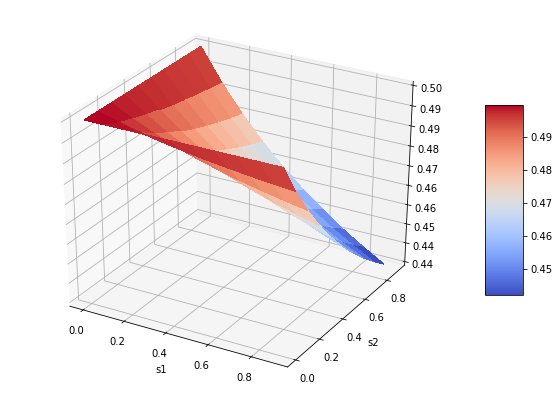

In [133]:
# implement
def v(s1, s2, b, u, c_p, k_p, k_1, k_2, k_t1, k_t2, k_i, w, w_t):
    q_p = c_p/k_p
    q_1 = s1/k_1
    q_2 = s2/k_2
    q_t1 = s1/k_t1
    q_t2 = s2/k_t2
    n = (b/u)*q_p*(1+w*q_1+w*q_2)
    d = (1+q_1+q_2+w_t*q_1*q_2+q_p*(1+w*q_1+w*q_2))
    return n / d

parmV = {
    'b':1,
    'u':1,
    'c_p':1,
    'k_p':1,
    'k_1':1,
    'k_2':1,
    'k_t1':1,
    'k_t2':1,
    'k_i':1,
    'w':1,
    'w_t':1
}

print(parmＶ)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib osx

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

# Make data.
s1 = np.arange(0, 1, 0.1)
s2 = np.arange(0, 1, 0.1)
s1, s2 = np.meshgrid(s1, s2)
z = v(s1,s2,**parmV)

# Plot the surface.
surf = ax.plot_surface(s1, s2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('s1')
ax.set_ylabel('s2') 
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()